In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data_qf = pd.read_csv('quantitative_finance_data.csv', parse_dates=['Date'])

# Data Preprocessing
data_qf.set_index('Date', inplace=True)
data_qf.fillna(method='ffill', inplace=True)

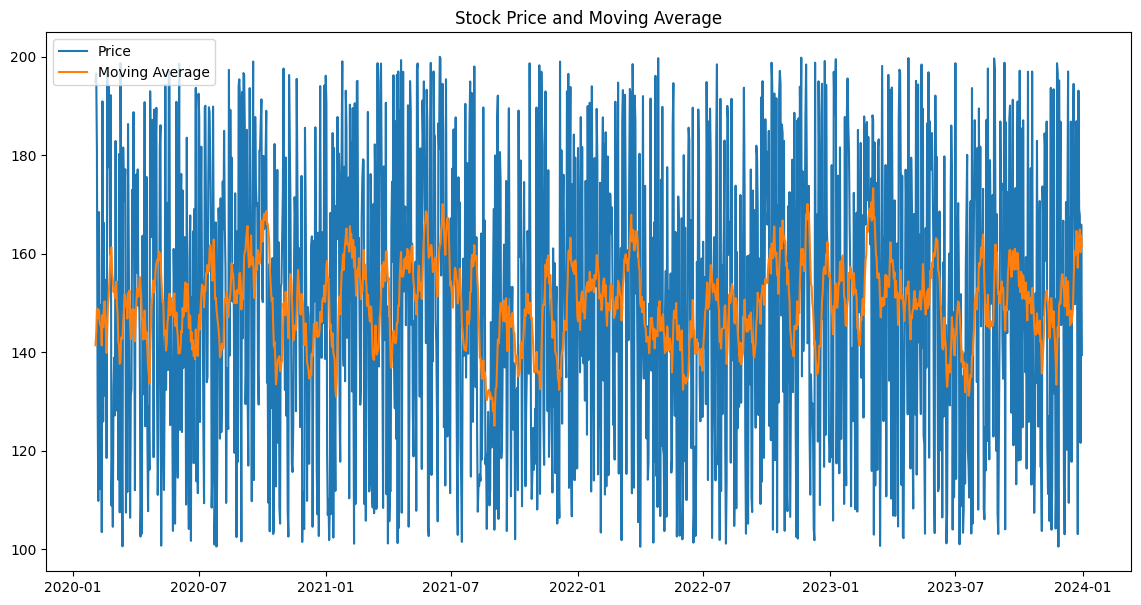

In [8]:
# EDA
plt.figure(figsize=(14, 7))
plt.plot(data_qf['Price'], label='Price')
plt.plot(data_qf['MA'], label='Moving Average')
plt.title('Stock Price and Moving Average')
plt.legend()
plt.show()


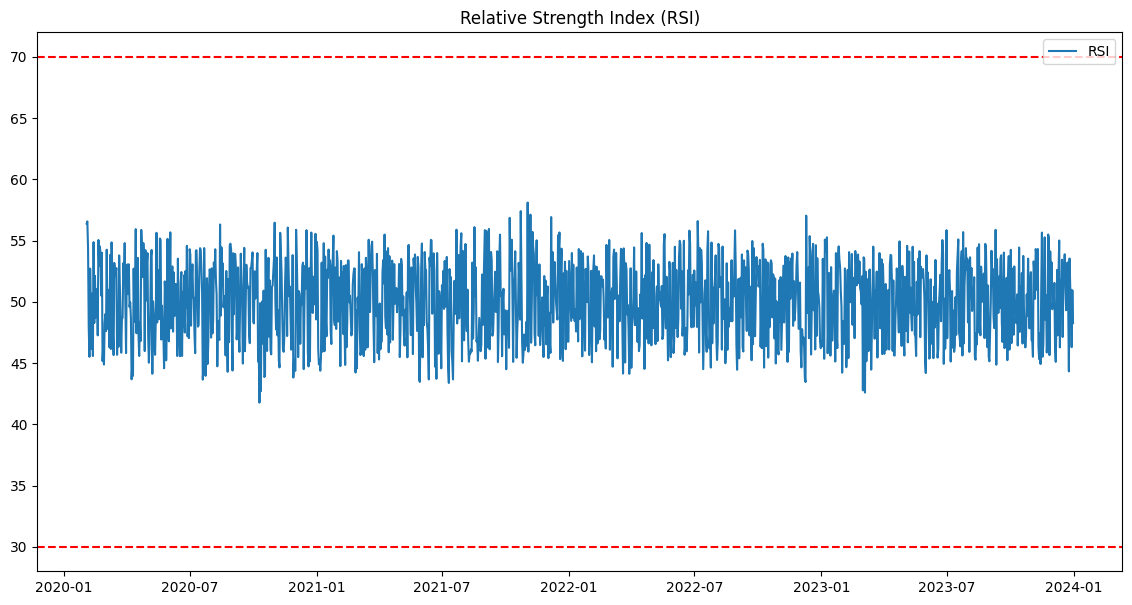

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(data_qf['RSI'], label='RSI')
plt.axhline(30, linestyle='--', color='r')
plt.axhline(70, linestyle='--', color='r')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()

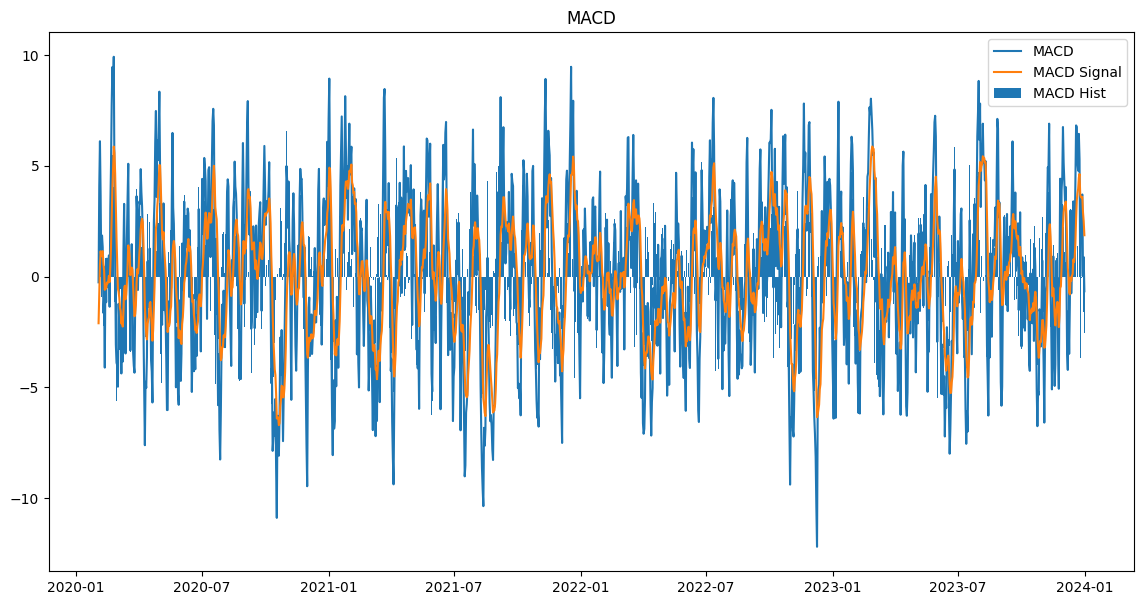

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(data_qf['MACD_12_26_9'], label='MACD')
plt.plot(data_qf['MACDs_12_26_9'], label='MACD Signal')
plt.bar(data_qf.index, data_qf['MACDh_12_26_9'], label='MACD Hist')
plt.title('MACD')
plt.legend()
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming 'data_qf' is already defined and loaded with the necessary data

# Scale data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_qf)


In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from tensorflow.keras.optimizers import Adam

# Scale data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_qf)

# Prepare data for time series forecasting
X = []
y = []
time_steps = 30  # Number of time steps to look back

for i in range(time_steps, len(data_scaled)):
    X.append(data_scaled[i-time_steps:i])
    y.append(data_scaled[i, 0])  # Predicting the stock price

X, y = np.array(X), np.array(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train models

# LSTM
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_steps, X_train.shape[2])),
    LSTM(50),
    Dense(1)
])
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# GRU
model_gru = Sequential([
    GRU(50, return_sequences=True, input_shape=(time_steps, X_train.shape[2])),
    GRU(50),
    Dense(1)
])
model_gru.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
model_gru.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate models
mse_lstm, mae_lstm = model_lstm.evaluate(X_test, y_test)
mse_gru, mae_gru = model_gru.evaluate(X_test, y_test)

print(f'LSTM - MSE: {mse_lstm}, MAE: {mae_lstm}')
print(f'GRU - MSE: {mse_gru}, MAE: {mae_gru}')

# Predict
y_pred_lstm = model_lstm.predict(X_test)
y_pred_gru = model_gru.predict(X_test)



Epoch 1/50
28/28 [==============================] - 6s 61ms/step - loss: 0.1228 - mae: 0.2910 - val_loss: 0.0934 - val_mae: 0.2670
Epoch 2/50
28/28 [==============================] - 1s 29ms/step - loss: 0.0868 - mae: 0.2548 - val_loss: 0.0923 - val_mae: 0.2668
Epoch 3/50
28/28 [==============================] - 1s 30ms/step - loss: 0.0872 - mae: 0.2550 - val_loss: 0.0935 - val_mae: 0.2714
Epoch 4/50
28/28 [==============================] - 1s 29ms/step - loss: 0.0860 - mae: 0.2539 - val_loss: 0.0927 - val_mae: 0.2655
Epoch 5/50
28/28 [==============================] - 1s 28ms/step - loss: 0.0872 - mae: 0.2529 - val_loss: 0.0942 - val_mae: 0.2654
Epoch 6/50
28/28 [==============================] - 1s 40ms/step - loss: 0.0864 - mae: 0.2549 - val_loss: 0.0904 - val_mae: 0.2663
Epoch 7/50
28/28 [==============================] - 1s 48ms/step - loss: 0.0865 - mae: 0.2548 - val_loss: 0.0918 - val_mae: 0.2692
Epoch 8/50
28/28 [==============================] - 1s 51ms/step - loss: 0.0857 - m